In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


                                #Netflix Movie Analysis



In [4]:
df = pd.read_csv(".\\netflix1.csv")
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [5]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [9]:
df.dtypes

show_id         object
type            object
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
dtype: object

In [10]:
#convertin the datatype from object to datetime
df['date_added'] = pd.to_datetime(df['date_added'])
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [18]:
df['year'] = df.date_added.dt.year
df['month'] = df.date_added.dt.month_name()
df['day'] = df.date_added.dt.day_name()
df.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year,month,day
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,September,Saturday
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September,Friday
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,September,Friday
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,September,Wednesday
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,September,Friday


In [23]:
print(df.type.unique())

['Movie' 'TV Show']


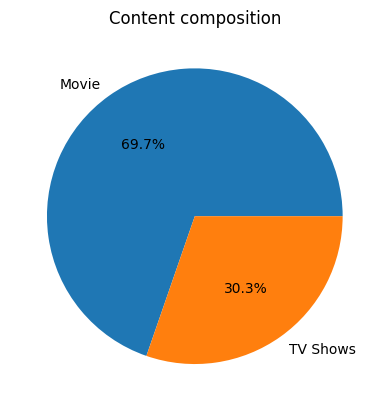

In [185]:
#What's composition of movies and TV shows on netflix
distribution = df['type'].value_counts()
plt.pie(x = distribution,autopct = "%0.1f%%",labels=['Movie','TV Shows'])
plt.title("Content composition")
plt.show()

Which country has the most Netflix series and films?

In [75]:
country_df = df.groupby(['country','type'])['title'].count().reset_index(name='count')
country_df = country_df[country_df['count']>130].sort_values(ascending=False,by='count')
country_df.reset_index(inplace=True)


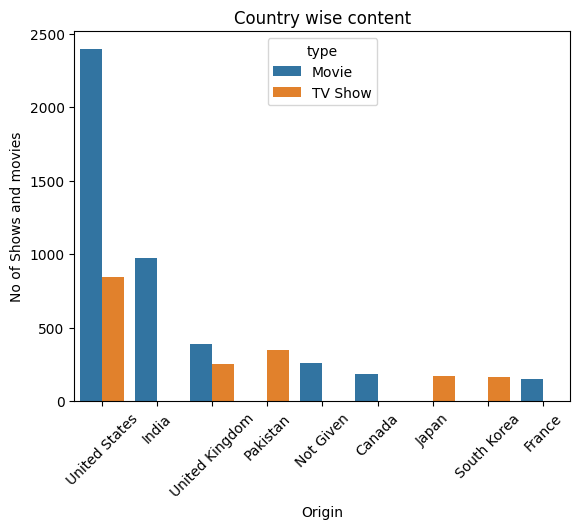

In [184]:
sns.barplot(x=country_df['country'],y = country_df['count'],hue = country_df['type'])
plt.xlabel('Origin')
plt.ylabel("No of Shows and movies")
plt.xticks(rotation=45)
plt.title("Country wise content")
plt.show()

What is the total amount of content added to Netflix each year?

In [97]:
added_in  = df.groupby(['year','type'])['year'].count().reset_index(name = 'count')
added_in.sort_values(by='year',ascending=False,inplace=True)
# added_in.reset_index()
added_in

,year,type,count
23,2021,TV Show,505
22,2021,Movie,993
21,2020,TV Show,595
20,2020,Movie,1284
19,2019,TV Show,592
18,2019,Movie,1424
17,2018,TV Show,411
16,2018,Movie,1237
15,2017,TV Show,349
14,2017,Movie,836


Text(0.5, 1.0, 'content added per year')

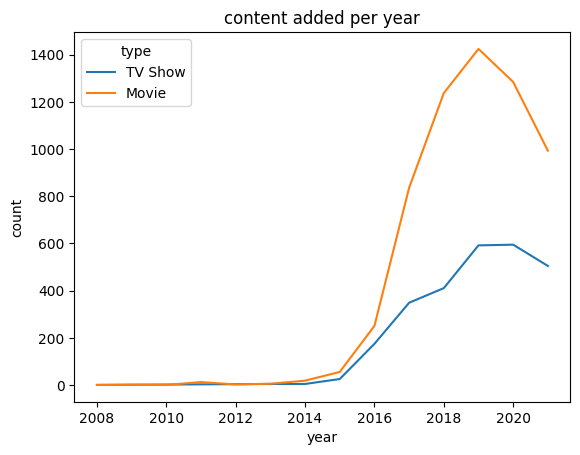

In [189]:
sns.lineplot(x = added_in['year'],y = added_in['count'],data = added_in,hue=added_in['type'])
plt.title("content added per year")

Which months have the most new films and TV shows added to Netlfix?

In [105]:
added_in_month  = df.groupby(['month','type'])['type'].count().reset_index(name = 'count')
added_in_month


,month,type,count
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,265
6,February,Movie,382
7,February,TV Show,180
8,January,Movie,545
9,January,TV Show,192


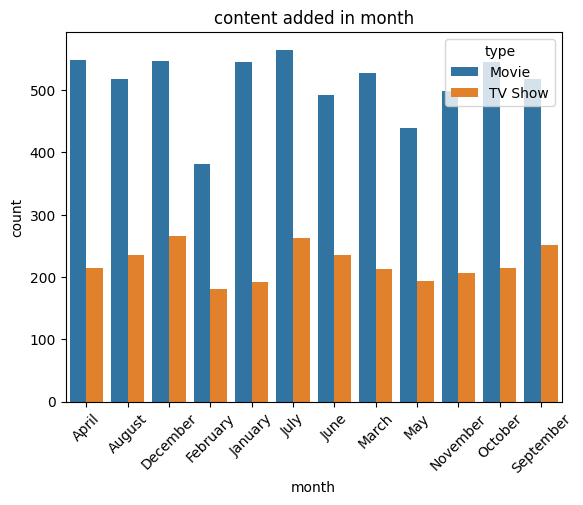

In [183]:
sns.barplot(x  = added_in_month['month'],y = added_in_month['count'], hue = added_in_month['type'])
plt.xticks(rotation = 45)
plt.title("content added in month")
plt.show()

Which Day have the most new films and TV shows added to Netlfix?

In [109]:
added_in_days  = df.groupby(['day','type'])['type'].count().reset_index(name = 'count')
added_in_days

,day,type,count
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


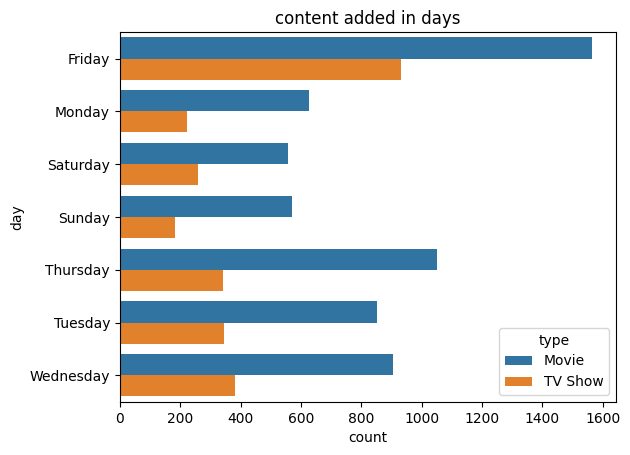

In [182]:
sns.barplot(x = added_in_days['count'],y = added_in_days['day'],hue =  added_in_days['type'])
plt.title("content added in days")
plt.show()

What genre? Have the most movies on Netflix, and how many genres are there on Netflix?

In [130]:
type_genre = df['listed_in'].unique()
genre = df.groupby('listed_in')['listed_in'].count().reset_index(name = 'count')
genre = genre[genre['count']>200].sort_values(by='count',ascending=False)
print(len(type_genre))

513


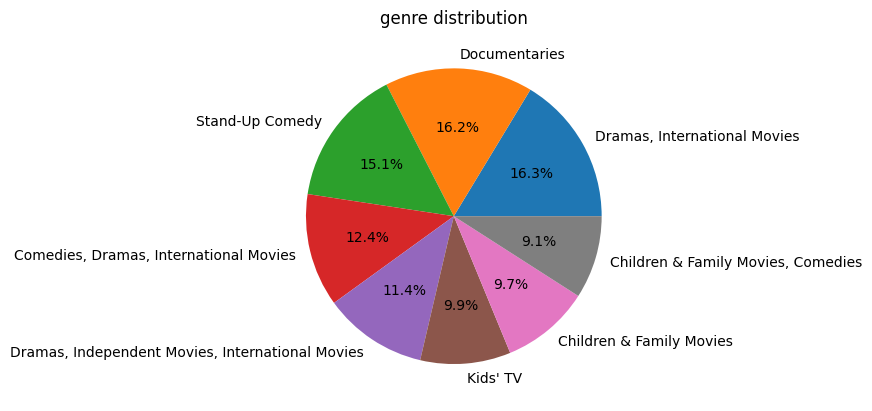

In [190]:
plt.pie(x = genre['count'],labels = genre['listed_in'],autopct="%0.1f%%")
plt.title("genre distribution")
plt.show()


Which Netflix ratings have the most content?

In [146]:
ratings_in  = df.groupby(['rating','type'])['rating'].count().reset_index(name = 'count')
ratings_in_movie = ratings_in[ratings_in['type']=='Movie'].sort_values(by='count',ascending=False)
ratings_in_movie

,rating,type,count
12,TV-MA,Movie,2062
8,TV-14,Movie,1427
6,R,Movie,797
14,TV-PG,Movie,540
5,PG-13,Movie,490
4,PG,Movie,287
18,TV-Y7,Movie,139
16,TV-Y,Movie,131
10,TV-G,Movie,126
2,NR,Movie,75


In [155]:
len(ratings_in_movie['count'])

14

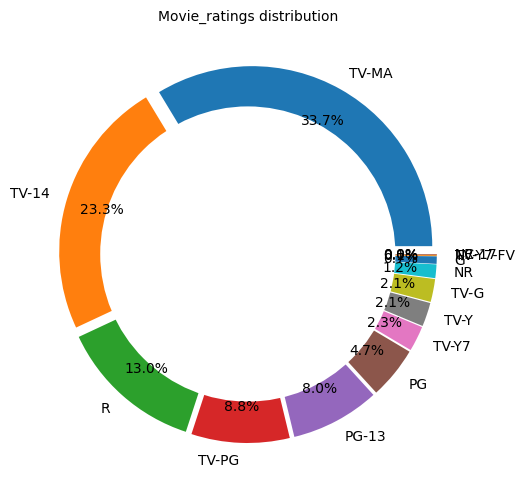

In [181]:
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
plt.pie(x =ratings_in_movie['count'],autopct="%.1f%%",pctdistance=0.80,explode=explode,labels=ratings_in_movie['rating'])
centre_circle = plt.Circle((0, 0), 0.82, fc='white')
plt.tight_layout()
plt.title('Movie_ratings distribution', fontsize=10)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# plt.show()

In [149]:
ratings_in_show = ratings_in[ratings_in['type']=='TV Show'].sort_values(by='count',ascending=False)
ratings_in_show

,rating,type,count
13,TV-MA,TV Show,1143
9,TV-14,TV Show,730
15,TV-PG,TV Show,321
19,TV-Y7,TV Show,194
17,TV-Y,TV Show,175
11,TV-G,TV Show,94
3,NR,TV Show,4
7,R,TV Show,2
21,TV-Y7-FV,TV Show,1


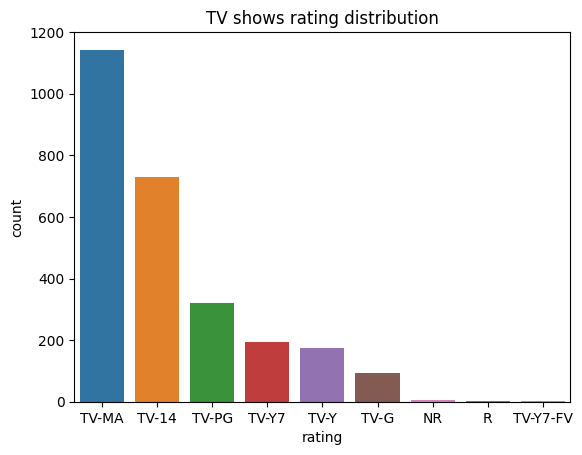

In [186]:
sns.barplot(x = ratings_in_show['rating'],y = ratings_in_show['count'])
plt.title("TV shows rating distribution")
plt.show()